# Introducción a regresión lineal 
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_29503/843001595.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos
Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

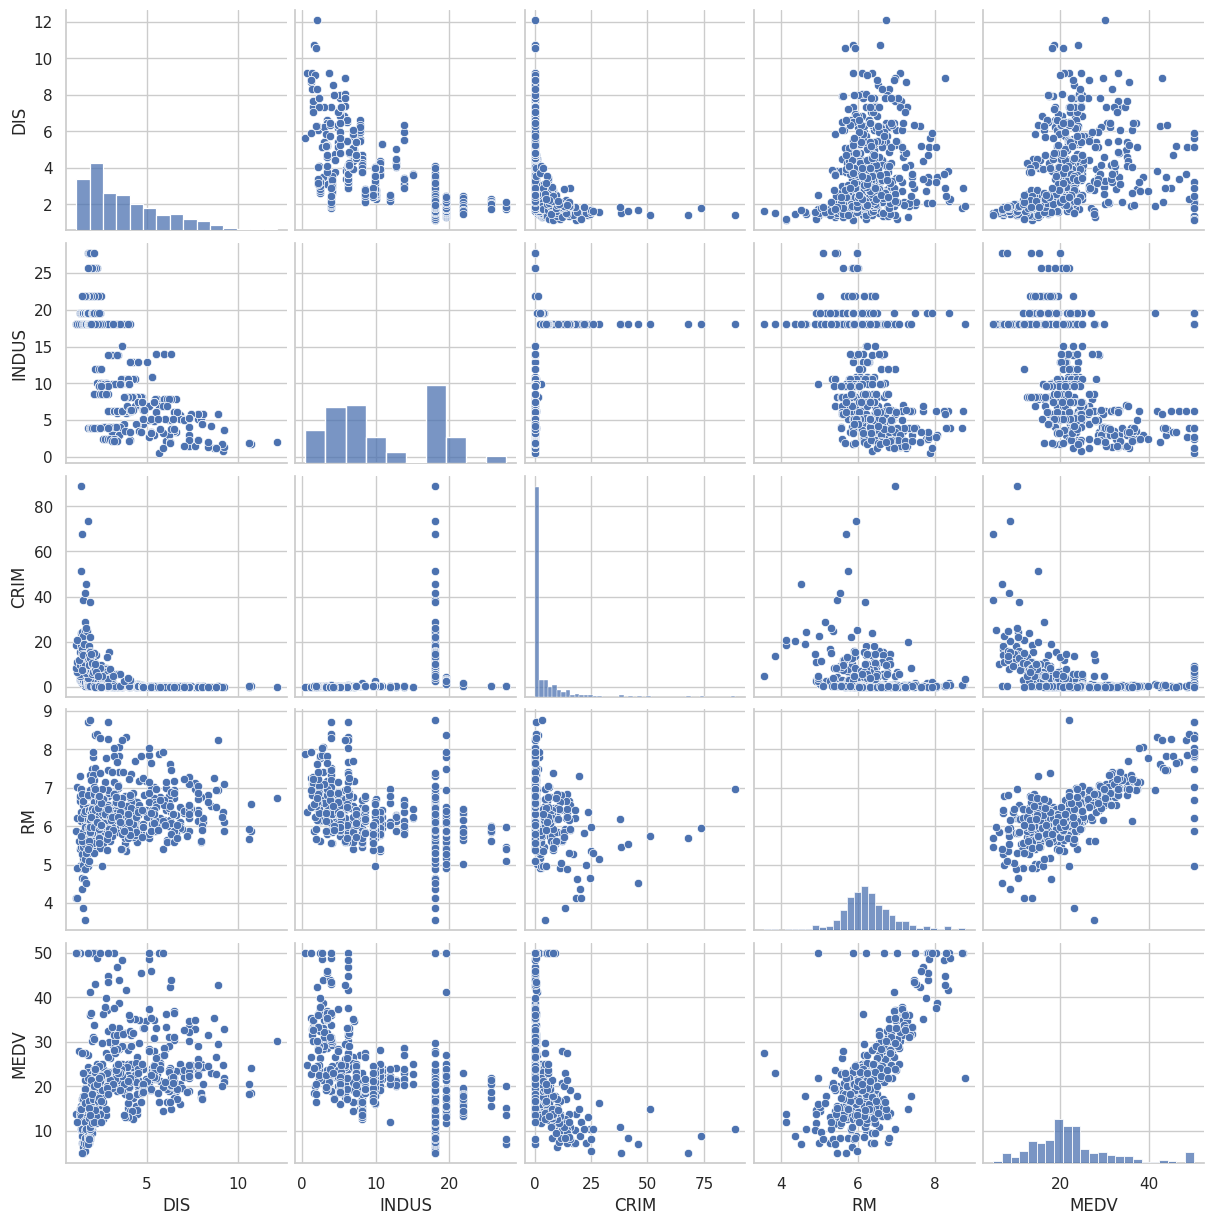

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', context='notebook')
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show()

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

<Axes: >

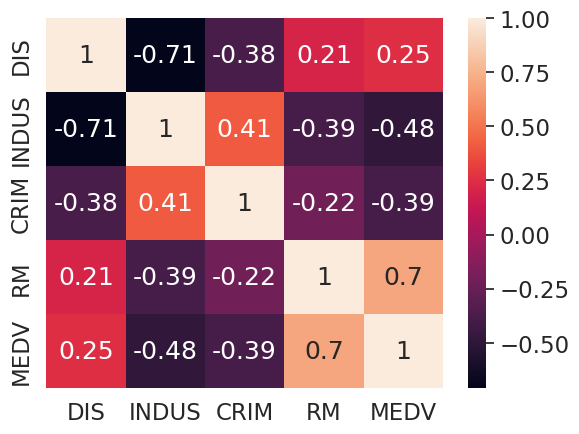

In [3]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)


## Creando modelo con scikit-learn

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['RM','INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)





,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Análisis de resultados

/home/ccortes/anaconda3/envs/ScikitLearnRegLin/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


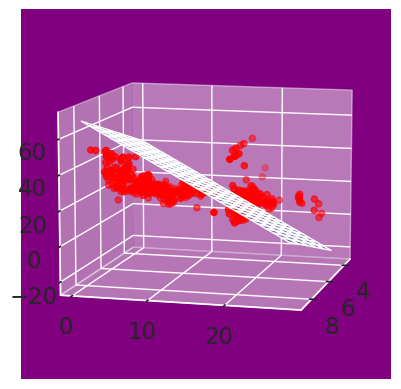

In [25]:
# --- Importación de Librerías ---
# Importa la librería principal para graficar en 2D y 3D. Se usa el alias 'plt'.
import matplotlib.pyplot as plt
# Importa herramientas específicas para crear gráficos en 3D desde matplotlib.
from mpl_toolkits.mplot3d import *
# Importa NumPy, una librería fundamental para cálculos numéricos, especialmente con arrays (vectores y matrices). Se usa el alias 'np'.
import numpy as np
# Se asume que pandas ya fue importado, por ejemplo como 'import pandas as pd', ya que se usa más adelante.

# --- Creación de una Malla (Grid) para el Plano de Predicción ---
# Define un rango de valores para la primera variable independiente ('RM').
# np.arange() crea una secuencia de números desde el valor mínimo de 'RM' en el DataFrame 'df' hasta su valor máximo.
x1_range = np.arange(df['RM'].min(), df['RM'].max())

# Hace lo mismo para la segunda variable independiente ('INDUS').
x2_range = np.arange(df['INDUS'].min(), df['INDUS'].max())

# np.meshgrid() crea dos matrices (grids) de coordenadas a partir de los dos rangos anteriores.
# 'x1_grid' y 'x2_grid' ahora contienen todas las combinaciones posibles de valores de 'RM' e 'INDUS' en el área del gráfico.
# Esto es esencial para poder dibujar una superficie continua (el plano de regresión).
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)


# --- Preparación de Datos para la Predicción ---
# Crea un nuevo DataFrame llamado 'plano'.
# .ravel() convierte las matrices 2D 'x1_grid' y 'x2_grid' en arrays 1D (las aplana).
# Este DataFrame contiene todas las combinaciones de puntos (RM, INDUS) sobre las que queremos predecir un valor.
plano = pd.DataFrame({'RM': x1_grid.ravel(), 'INDUS': x2_grid.ravel()})


# --- Realización y Formateo de las Predicciones ---
# Utiliza un modelo de regresión ya entrenado (asumimos que 'slr' es un objeto de modelo, ej. de Scikit-learn).
# .predict(plano) calcula el valor predicho para cada par de puntos (RM, INDUS) en el DataFrame 'plano'.
# .reshape(x1_grid.shape) transforma el resultado (que es un array 1D) de nuevo a una matriz 2D con la misma forma que 'x1_grid'.
# Esto es necesario para que las dimensiones de X, Y y Z coincidan al graficar la superficie.
pred = slr.predict(plano).reshape(x1_grid.shape)

# Si la variable dependiente fue escalada antes de entrenar el modelo (una práctica común),
# 'sc_y' sería el objeto escalador (ej. StandardScaler).
# .inverse_transform() revierte la escala de las predicciones, devolviéndolas a sus unidades originales para que puedan ser interpretadas y graficadas correctamente.
pred = sc_y.inverse_transform(pred)


# --- Creación y Configuración del Gráfico 3D ---
# Crea una nueva figura, que es el contenedor principal para todos los elementos del gráfico.
fig = plt.figure()

# Añade un sistema de ejes (un subplot) a la figura.
# El argumento projection='3d' especifica que este será un gráfico tridimensional.
ax = fig.add_subplot(projection='3d', facecolor='purple')

# Dibuja la superficie de predicción (el plano de regresión).
# Usa 'x1_grid' para el eje X, 'x2_grid' para el eje Y, y las predicciones 'pred' para el eje Z.
# 'alpha=0.5' establece la transparencia de la superficie al 50%, permitiendo ver los puntos de datos que están detrás.
ax.plot_surface(x1_grid, x2_grid, pred, alpha=0.5)

# Dibuja los puntos de datos originales sobre el mismo gráfico 3D.
# ax.scatter() crea un diagrama de dispersión.
# Usa las columnas 'RM' e 'INDUS' del DataFrame original para las coordenadas X e Y, y la columna 'MEDV' (la variable real) para la coordenada Z.
# 'color' y 'marker' definen la apariencia de los puntos (círculos rojos).
ax.scatter(df['RM'], df['INDUS'], df['MEDV'], color='red', marker='o')

# Configura el ángulo de visión de la cámara para el gráfico 3D.
# 'elev' es la elevación (ángulo vertical) y 'azim' es el azimut (ángulo horizontal/rotación).
# Esto ayuda a encontrar la perspectiva más clara para visualizar la relación entre el plano y los puntos.
ax.view_init(elev=10, azim=15)


# --- Visualización del Gráfico ---
# Muestra la figura con todos los elementos graficados.
plt.show()

## Generando predicción con el modelo

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['RM','INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)
#Usando el modelo entrenado slr, predice el precio de una casa con 5 habitaciones (RM=5) e índice industrial (INDUS=5.0).
num_hab = 5
indus = 5.0
num_hab_std = sc_x.transform([[num_hab, indus]])
print("Elprecio de una casa con 5 habitaciones es ", sc_y.inverse_transform(slr.predict(num_hab_std)))







Elprecio de una casa con 5 habitaciones es  [[14.53839039]]
